### 연관규칙분석, 장바구니분석 (Association Rule Analysis, Market Basket Analysis) 
: 고객의 대규모 거래데이터로부터 함께 구매가 발생하는 규칙(예: A à 동시에 B)을 도출하여,    
고객이 특정 상품 구매 시 이와 연관성 높은 상품을 추천   
비지도 학습의 일종

**지지도(support)**    
: 한 거래 항목 안에 A와 B를 동시에 포함하는 거래의 비율.    
                  지지도는 A와 B가 함께 등장할 확률이다.     
                  전체 거래의 수를 A와 B가 동시에 포함된 거래수를 나눠주면 구할 수 있다.   

**신뢰도(confidence)**   
: 항목 A가 포함하는 거래에 A와 B가 같이 포함될 확률.    
신뢰도는 조건부 확률과 유사하다. A가 일어났을 때 B의 확률이다.    
A의 확률을 A와 B가 동시에 포함될 확률을 나눠주면 구할 수 있다.   

**향상도(lift)**   
: A가 주어지지 않을 때의 품목 B의 확률에 비해 A가 주어졌을 때 품목 B의 증가 비율.    
B의 확률이 A가 일어났을 때 B의 확률을 나눴을 때 구할 수 있다.    
lift 값은 1이면 서로 독립적인 관계이며 1보다 크면 두 품목이 서로 양의 상관관계,    
1보다 작으면 두 품목이 서로 음의 상관관계이다. A와 B가 독립이면 분모, 분자가 같기 때문에 1이 나온다.   

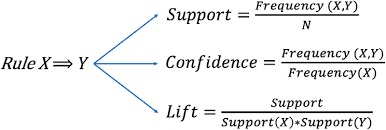

**연관규칙 알고리즘**
1. Apriori algorithm 
2. FP-Growth algorithm 
3. DHP algorithm

#### 1) mlxtend 예제

In [7]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [2]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [38]:
dataset

[['Milk', 'Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
 ['Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Eggs'],
 ['Milk', 'Unicorn', 'Corn', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Ice cream', 'Eggs']]

In [3]:
df.head()

,Apple,Corn,Eggs,Ice cream,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,True,False,True,True,True,False,True
1,False,False,True,False,False,True,True,False,True
2,True,False,True,False,True,False,False,False,False
3,False,True,False,False,True,False,False,True,True
4,False,True,True,True,False,False,True,False,False


In [4]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

In [5]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf


In [9]:
frequent_itemsets_fp=fpgrowth(df, min_support=0.6, use_colnames=True)

In [11]:
association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf


결론: Egg를 살 때 Onion이랑 같이 산다. 

#### 2) Groceries dataset

In [105]:
import csv
path='C:/ISLR-python-master/Notebooks/Data/'
file='groceries.csv'
f=open(path+file, 'rt')
reader=csv.reader(f)

csv_list=[]
for l in reader:
    csv_list.append(l)
f.close()

grocery_df=pd.DataFrame(csv_list)

In [106]:
grocery_df.shape

(9835, 32)

In [107]:
import numpy as np
grocery_df.replace(to_replace=[None], value='s', inplace=True)

In [125]:
grocery_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,tropical fruit,yogurt,coffee,s,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
2,whole milk,s,s,s,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
3,pip fruit,yogurt,cream cheese,meat spreads,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
4,other vegetables,whole milk,condensed milk,long life bakery product,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s


In [109]:
grocery_df.loc[0,:]

0            citrus fruit
1     semi-finished bread
2               margarine
3             ready soups
4                       s
5                       s
6                       s
7                       s
8                       s
9                       s
10                      s
11                      s
12                      s
13                      s
14                      s
15                      s
16                      s
17                      s
18                      s
19                      s
20                      s
21                      s
22                      s
23                      s
24                      s
25                      s
26                      s
27                      s
28                      s
29                      s
30                      s
31                      s
Name: 0, dtype: object

In [110]:
test_df=grocery_df.loc[0,:]

In [116]:
test_list=[]
for i in range(len(test_df)):
        test_list.append(test_df[i])

In [122]:
test_list.index('s')

4

In [123]:
test_list[:test_list.index('s')]

['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']

In [128]:
total_list=[]
for i in range(9835):
    test_list=[]
    for j in range(len(grocery_df.loc[i,:])):
        test_list.append(grocery_df.loc[i,j])
    total_list.append(test_list)

In [133]:
new_list=[]
for i in range(9835):
    list1=total_list[i]
    if 's' in list1:
        list1=list1[:list1.index('s')]
        new_list.append(list1)
    else:
        continue

In [134]:
new_list

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [135]:
len(new_list)

9834

In [136]:
te = TransactionEncoder()
te_ary = te.fit(new_list).transform(new_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [137]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

In [141]:
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [140]:
df.shape

(9834, 169)

In [145]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df = df.applymap(encode_units)

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [149]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(other vegetables),0.052369,0.193411,0.019626,0.374757,1.937625,0.009497,1.290042
1,(other vegetables),(beef),0.193411,0.052369,0.019626,0.101472,1.937625,0.009497,1.054648
2,(beef),(rolls/buns),0.052369,0.183852,0.013525,0.258252,1.404676,0.003896,1.100304
3,(rolls/buns),(beef),0.183852,0.052369,0.013525,0.073562,1.404676,0.003896,1.022875
4,(beef),(root vegetables),0.052369,0.108908,0.017287,0.330097,3.030975,0.011584,1.330181
5,(root vegetables),(beef),0.108908,0.052369,0.017287,0.158730,3.030975,0.011584,1.126429
6,(beef),(whole milk),0.052369,0.255440,0.021151,0.403883,1.581127,0.007774,1.249017
7,(whole milk),(beef),0.255440,0.052369,0.021151,0.082803,1.581127,0.007774,1.033181
8,(beef),(yogurt),0.052369,0.139414,0.011592,0.221359,1.587780,0.004291,1.105241
9,(yogurt),(beef),0.139414,0.052369,0.011592,0.083151,1.587780,0.004291,1.033573


In [150]:
rules.shape

(586, 9)

In [155]:
even_num=list(range(0, 586, 2))
even_num

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 154,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198,
 200,
 202,
 204,
 206,
 208,
 210,
 212,
 214,
 216,
 218,
 220,
 222,
 224,
 226,
 228,
 230,
 232,
 234,
 236,
 238,
 240,
 242,
 244,
 246,
 248,
 250,
 252,
 254,
 256,
 258,
 260,
 262,
 264,
 266,
 268,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 288,
 290,
 292,
 294,
 296,
 298,
 300,
 302,
 304,
 306,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 324,
 326,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 342,
 344,
 346,
 348,
 350,

In [157]:
rules_rev = rules[np.arange(len(rules)) % 2 == 0]
rules_rev

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(other vegetables),0.052369,0.193411,0.019626,0.374757,1.937625,0.009497,1.290042
2,(beef),(rolls/buns),0.052369,0.183852,0.013525,0.258252,1.404676,0.003896,1.100304
4,(beef),(root vegetables),0.052369,0.108908,0.017287,0.330097,3.030975,0.011584,1.330181
6,(beef),(whole milk),0.052369,0.255440,0.021151,0.403883,1.581127,0.007774,1.249017
8,(beef),(yogurt),0.052369,0.139414,0.011592,0.221359,1.587780,0.004291,1.105241
...,...,...,...,...,...,...,...,...,...
576,"(tropical fruit, whole milk)",(yogurt),0.042201,0.139414,0.015050,0.356627,2.558034,0.009166,1.337615
578,(tropical fruit),"(yogurt, whole milk)",0.104840,0.055928,0.015050,0.143550,2.566673,0.009186,1.102308
580,"(yogurt, whipped/sour cream)",(whole milk),0.020643,0.255440,0.010779,0.522167,2.044186,0.005506,1.558202
582,"(whipped/sour cream, whole milk)",(yogurt),0.032133,0.139414,0.010779,0.335443,2.406088,0.006299,1.294977


### 3) 예제 2 (ADP 모의고사 1회 1번)

Q1) 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오.     
단, 본 분석에서 로또번호가 추첨된 순서는 고려하지 않고 분석을 수행하도록 한다.     
그리고 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력하고 이에 대해 설명하시오.     

In [3]:
import csv
import pandas as pd
path='C:/ISLR-python-master/Notebooks/Data/'
file='lotto.csv'
f=open(path+file, 'rt')
reader=csv.reader(f)

csv_list=[]
for l in reader:
    csv_list.append(l)
f.close()

lotto_df=pd.DataFrame(csv_list)
lotto_df.head()

,0,1,2,3,4,5,6
0,time_id,num1,num2,num3,num4,num5,num6
1,859,8,22,35,38,39,41
2,858,9,13,32,38,39,43
3,857,6,10,16,28,34,38
4,856,10,24,40,41,43,44


In [4]:
lotto_df = lotto_df.rename(columns=lotto_df.iloc[0])
lotto_df

,time_id,num1,num2,num3,num4,num5,num6
0,time_id,num1,num2,num3,num4,num5,num6
1,859,8,22,35,38,39,41
2,858,9,13,32,38,39,43
3,857,6,10,16,28,34,38
4,856,10,24,40,41,43,44
...,...,...,...,...,...,...,...
855,5,16,24,29,40,41,42
856,4,14,27,30,31,40,42
857,3,11,16,19,21,27,31
858,2,9,13,21,25,32,42


In [5]:
lotto_df = lotto_df.drop(lotto_df.index[0])
lotto_df

,time_id,num1,num2,num3,num4,num5,num6
1,859,8,22,35,38,39,41
2,858,9,13,32,38,39,43
3,857,6,10,16,28,34,38
4,856,10,24,40,41,43,44
5,855,8,15,17,19,43,44
...,...,...,...,...,...,...,...
855,5,16,24,29,40,41,42
856,4,14,27,30,31,40,42
857,3,11,16,19,21,27,31
858,2,9,13,21,25,32,42


In [7]:
from mlxtend.preprocessing import TransactionEncoder

In [43]:
new_list=[]
for i in range(1, 860):
    selected_row=lotto_df.loc[i,:]
    oneline_list=[]
    for j in ['num1', 'num2', 'num3', 'num4', 'num5', 'num6']:
        oneline_list.append(selected_row[j])
    new_list.append(oneline_list)

In [44]:
new_list

[['8', '22', '35', '38', '39', '41'],
 ['9', '13', '32', '38', '39', '43'],
 ['6', '10', '16', '28', '34', '38'],
 ['10', '24', '40', '41', '43', '44'],
 ['8', '15', '17', '19', '43', '44'],
 ['20', '25', '31', '32', '36', '43'],
 ['2', '8', '23', '26', '27', '44'],
 ['11', '17', '28', '30', '33', '35'],
 ['14', '18', '22', '26', '31', '44'],
 ['16', '20', '24', '28', '36', '39'],
 ['5', '13', '17', '29', '34', '39'],
 ['1', '2', '16', '22', '38', '39'],
 ['12', '16', '26', '28', '30', '42'],
 ['5', '18', '30', '41', '43', '45'],
 ['1', '16', '29', '33', '40', '45'],
 ['7', '8', '13', '15', '33', '45'],
 ['19', '21', '30', '33', '34', '42'],
 ['14', '26', '32', '36', '39', '42'],
 ['5', '11', '14', '30', '33', '38'],
 ['2', '4', '11', '28', '29', '43'],
 ['3', '9', '11', '12', '13', '19'],
 ['9', '14', '17', '33', '36', '38'],
 ['2', '25', '28', '30', '33', '45'],
 ['1', '9', '11', '14', '26', '28'],
 ['9', '10', '13', '28', '38', '45'],
 ['6', '8', '18', '35', '42', '43'],
 ['12', '18

In [45]:
te = TransactionEncoder()
te_ary = te.fit(new_list).transform(new_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [46]:
df

,1,10,11,12,13,14,15,16,17,18,...,41,42,43,44,45,5,6,7,8,9
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,True,False,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,False
855,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
856,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
857,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


** 반드시 list 형태로 입력 데이터를 만들어줘야 제대로 돌아감.

In [50]:
df.sum()

1     122
10    122
11    120
12    123
13    122
14    122
15    116
16    110
17    123
18    121
19    118
2     112
20    124
21    112
22     92
23     99
24    115
25    111
26    116
27    126
28    105
29    106
3     111
30    105
31    118
32     97
33    121
34    134
35    106
36    115
37    117
38    113
39    118
4     115
40    126
41    105
42    108
43    125
44    113
45    121
5     119
6     108
7     114
8     119
9      89
dtype: int64

In [54]:
top10=df.sum().sort_values(ascending=False).head(10)

In [58]:
top10.index

Index(['34', '27', '40', '43', '20', '12', '17', '14', '13', '1'], dtype='object')

<BarContainer object of 10 artists>

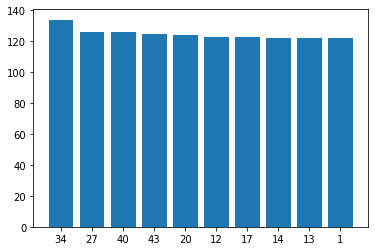

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(top10.index, df.sum()[top10.index])

가장 많이 등장한 상위 10개의 로또번호를 transaction 데이터에서 번호별로 합계를 구하여 정렬 할 경우    
34번이 가장 많이 등장한 것을 알 수 있다. 

Q2) 변환한 데이터에 대해 apriori함수를 사용하여 다음 괄호 안의 조건을 반영하여     
연관규칙을 생성하고, 이를 ‘rules_1’이라는 변수에 저장하여 결과를 해석하시오.     
(최소 지지도 : 0.002, 최소 신뢰도 : 0.8, 최소조합 항목 수 : 2개, 최대조합 항목 수 : 6개)     
그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고,     
이를 데이터프레임으로 변환하여 csv파일로 출력하시오.   

In [134]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
frequent_itemsets = apriori(df, min_support=0.002, use_colnames=True, max_len=6)
rules_1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

In [135]:
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(17, 1, 10)",(31),0.002328,0.137369,0.002328,1.0,7.279661,0.002008,inf
1,"(1, 31, 10)",(17),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf
2,"(1, 40, 20)",(10),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
3,"(40, 20, 10)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
4,"(26, 1, 11)",(14),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
...,...,...,...,...,...,...,...,...,...
699,"(34, 7, 31)","(22, 24)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
700,"(34, 22, 24)","(7, 31)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
701,"(22, 7, 31)","(34, 24)",0.002328,0.017462,0.002328,1.0,57.266667,0.002288,inf
702,"(7, 31, 24)","(34, 22)",0.002328,0.017462,0.002328,1.0,57.266667,0.002288,inf


In [98]:
len(rules_1['antecedents'][0])

3

In [99]:
len(rules_1['consequents'][0])

1

In [136]:
rules_1['count']=0
for i in range(704):
    print(rules_1['antecedents'][i])
    print(rules_1['consequents'][i])
    rules_1['count'][i]=len(rules_1['antecedents'][i])+len(rules_1['consequents'][i])

frozenset({'17', '1', '10'})
frozenset({'31'})
frozenset({'1', '31', '10'})
frozenset({'17'})
frozenset({'1', '40', '20'})
frozenset({'10'})
frozenset({'40', '20', '10'})
frozenset({'1'})
frozenset({'26', '1', '11'})
frozenset({'14'})
frozenset({'26', '1', '14'})
frozenset({'11'})
frozenset({'1', '11', '14'})
frozenset({'26'})
frozenset({'1', '11', '5'})
frozenset({'18'})
frozenset({'18', '11', '5'})
frozenset({'1'})
frozenset({'1', '11', '21'})
frozenset({'44'})
frozenset({'1', '11', '44'})
frozenset({'21'})
frozenset({'1', '21', '44'})
frozenset({'11'})
frozenset({'44', '11', '21'})
frozenset({'1'})
frozenset({'1', '18', '23'})
frozenset({'12'})
frozenset({'18', '12', '23'})
frozenset({'1'})
frozenset({'1', '12', '7'})
frozenset({'23'})
frozenset({'1', '9', '23'})
frozenset({'12'})
frozenset({'28', '41', '12'})
frozenset({'1'})
frozenset({'43', '1', '3'})
frozenset({'12'})
frozenset({'43', '1', '33'})
frozenset({'13'})
frozenset({'1', '33', '13'})
frozenset({'43'})
frozenset({'1', '5

<ipython-input-136-2204d99def45>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_1['count'][i]=len(rules_1['antecedents'][i])+len(rules_1['consequents'][i])



frozenset({'42'})
frozenset({'28', '43', '42'})
frozenset({'27'})
frozenset({'28', '27', '42'})
frozenset({'43'})
frozenset({'8', '29', '3'})
frozenset({'27'})
frozenset({'36', '5', '29'})
frozenset({'27'})
frozenset({'40', '27', '9'})
frozenset({'29'})
frozenset({'40', '9', '29'})
frozenset({'27'})
frozenset({'27', '9', '29'})
frozenset({'40'})
frozenset({'27', '30', '8'})
frozenset({'3'})
frozenset({'8', '30', '3'})
frozenset({'27'})
frozenset({'34', '27', '36'})
frozenset({'5'})
frozenset({'27', '35', '45'})
frozenset({'43'})
frozenset({'28', '7', '39'})
frozenset({'29'})
frozenset({'28', '39', '29'})
frozenset({'7'})
frozenset({'28', '40', '33'})
frozenset({'4'})
frozenset({'28', '38', '7'})
frozenset({'6'})
frozenset({'34', '39', '29'})
frozenset({'5'})
frozenset({'38', '35', '29'})
frozenset({'44'})
frozenset({'41', '6', '29'})
frozenset({'39'})
frozenset({'41', '39', '29'})
frozenset({'6'})
frozenset({'39', '6', '29'})
frozenset({'41'})
frozenset({'43', '31', '3'})
frozenset({'

In [101]:
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,count
0,"(17, 1, 10)",(31),0.002328,0.137369,0.002328,1.0,7.279661,0.002008,inf,4
1,"(1, 31, 10)",(17),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf,4
2,"(1, 40, 20)",(10),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,4
3,"(40, 20, 10)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,4
4,"(26, 1, 11)",(14),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,4
...,...,...,...,...,...,...,...,...,...,...
699,"(34, 7, 31)","(22, 24)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
700,"(34, 22, 24)","(7, 31)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
701,"(22, 7, 31)","(34, 24)",0.002328,0.017462,0.002328,1.0,57.266667,0.002288,inf,5
702,"(7, 31, 24)","(34, 22)",0.002328,0.017462,0.002328,1.0,57.266667,0.002288,inf,5


In [137]:
rules_1['count'].value_counts()

4    632
5     72
Name: count, dtype: int64

In [168]:
rules_1.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,count,in34
count,704.000000,704.000000,704.000000,704.0,704.000000,704.000000,704.0,704.000000,704.0
mean,0.002363,0.131062,0.002363,1.0,9.297555,0.002053,inf,4.102273,0.0
std,0.000198,0.023771,0.000198,0.0,9.994010,0.000177,NaN,0.303222,0.0
min,0.002328,0.012806,0.002328,1.0,6.410448,0.001965,inf,4.000000,0.0
25%,0.002328,0.129220,0.002328,1.0,7.040984,0.001998,inf,4.000000,0.0
50%,0.002328,0.136205,0.002328,1.0,7.341880,0.002014,inf,4.000000,0.0
75%,0.002328,0.142026,0.002328,1.0,7.738739,0.002028,inf,4.000000,0.0
max,0.003492,0.155995,0.003492,1.0,78.090909,0.003098,inf,5.000000,0.0


In [150]:
final_association_rules=rules_1.sort_values(by=['lift'], ascending=False, axis=0)[:30]
final_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,count
700,"(34, 22, 24)","(7, 31)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
699,"(34, 7, 31)","(22, 24)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
687,"(26, 16, 31)","(43, 36)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
703,"(22, 31, 24)","(34, 7)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
667,"(26, 14, 21)","(18, 15)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
652,"(15, 20, 24)","(12, 30)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
685,"(26, 43, 16)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
637,"(34, 36, 10)","(44, 22)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
688,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf,5
638,"(34, 22, 10)","(36, 44)",0.002328,0.016298,0.002328,1.0,61.357143,0.002290,inf,5


In [151]:
final_association_rules=final_association_rules.reset_index()

In [152]:
final_association_rules

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,count
0,700,"(34, 22, 24)","(7, 31)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
1,699,"(34, 7, 31)","(22, 24)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
2,687,"(26, 16, 31)","(43, 36)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
3,703,"(22, 31, 24)","(34, 7)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
4,667,"(26, 14, 21)","(18, 15)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
5,652,"(15, 20, 24)","(12, 30)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
6,685,"(26, 43, 16)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
7,637,"(34, 36, 10)","(44, 22)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
8,688,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf,5
9,638,"(34, 22, 10)","(36, 44)",0.002328,0.016298,0.002328,1.0,61.357143,0.002290,inf,5


In [106]:
final_association_rules.to_csv('final_association_rules.csv')

Q3) 생성된 연관규칙 'rules_1'에 대한 정보를 해석하고, 1)번 문제를 통해 확인했을 때    
가장 많이 추첨된 번호가 우측항에 존재하는 규칙들만을 ‘rules_most_freq’라는 변수에 저장하시오.     
그리고 해당 규칙들을 해석하여 인사이트를 도출한 후 서술하시오.   

In [180]:
rules_1['in34']=0
for i in range(704):
    rules_1['in34'][i]='34' in list(rules_1['consequents'])[i]

<ipython-input-180-c12cb126e136>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_1['in34'][i]='34' in list(rules_1['consequents'])[i]
C:\Users\myeon\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [181]:
print(len(rules_1[rules_1['in34']==True]))
rules_1[rules_1['in34']==True]

23


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,count,in34,total_num
21,"(1, 5, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,True,"[1, 5, 13, 34]"
181,"(36, 12, 37)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,True,"[36, 12, 37, 34]"
224,"(13, 5, 29)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,True,"[13, 5, 29, 34]"
269,"(14, 25, 44)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,True,"[14, 25, 44, 34]"
289,"(41, 15, 19)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,True,"[41, 15, 19, 34]"
294,"(21, 2, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,True,"[21, 2, 15, 34]"
298,"(28, 15, 2)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,True,"[28, 15, 2, 34]"
391,"(17, 5, 29)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,True,"[17, 5, 29, 34]"
392,"(17, 33, 32)",(34),0.003492,0.155995,0.003492,1.0,6.410448,0.002948,inf,4,True,"[17, 33, 32, 34]"
396,"(17, 45, 42)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,True,"[17, 45, 42, 34]"


총 704개의 연관규칙이 도출되었으며, 그 중 632개의 규칙은 4개의 로또번호로 구성되었고    
72개의 규칙은 5개의 번호로 구성되었다.     
규칙들에 대한 향상도의 최소값은 6.410448으로 꽤 높게 나타났으며,   
추첨번호들의 교집합 확률을 의미하는 지지도의 평균은 0.002363로 나타났다.    
트랜잭션 데이터의 개수는 859개이며, 트랜잭션 데이터는 859회 동안의 로또 당첨번호들을 의미한다.    

총 23개의 규칙이 도출되었으며,   
[21]번 규칙을 확인해 보면, {1, 5, 13}번과 {34}번이 함께 추첨될 확률은    
support(지지도)를 확인한 결과 0.002328이며 이는 약 0.2%에 해당한다.   
이 규칙의 lift(향상도)는 6.410448로 이는 {34}만 추첨됐을 때 보다    
{1, 5, 13}번이 뽑히고 {34}도 뽑힐 확률이 약 6배 높다는 것을 의미한다.   
하지만 이러한 규칙들은 로또번호가 추첨되는 순서를 고려하지 않고    
단순히 조합에 대한 확률만을 고려한 규칙이므로,   
향상도가 높은 숫자들의 조합이 로또 추첨번호가 될 가능성이 높은 것은 아니다.   